# **Unveiling the Mind: Exploring MBTI with Data Analysis and Classification**

## **Additional information**

This Python notebook delves into the world of Myers-Briggs Type Indicator (MBTI) personalities. It explores a dataset containing 60000 responses to 60 questions (encoded on a 7-point scale) -<br>
**<br>
Fully Agree        :  3<br>
Partially Agree    :  2<br>
Slightly Agree     :  1<br>
Neutral            :  0<br>
Slightly disagree  : -1<br>
Partially disagree : -2<br>
Fully disagree     : -3<br>
<br>**
and their association with 16 different MBTI types -<br>
**<br>
INTJ,
INTP,
ENTJ,
ENTP,
INFJ,
INFP,
ENFJ,
ENFP,
ISTJ,
ISFJ,
ESTJ,
ESFJ,
ISTP,
ISFP,
ESTP,
ESFP<br>**
<br> Through data visualization and a comparative analysis of classifiers, the effectiveness of the machine learning algorithms in predicting MBTI types based on questionnaire responses is assessed.


## **Importing required resources**

**Importing libraries**

In [107]:
import pandas as pd
import chardet

import seaborn as sns
import matplotlib.pyplot as plt

import time

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.decomposition import PCA

**Importing dataset**

In [108]:
data_path = '/content/drive/MyDrive/Colab Notebooks/machine-learning/data/16P.csv'

with open(data_path, 'rb') as f:
    enc = chardet.detect(f.readline())

df = pd.read_csv(data_path, encoding = enc['encoding'])

## **Data exploration and visualisation**

**Displaying sample of the dataset**

In [109]:
df.head()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


**Dropping unwanted column(s)**

In [110]:
df = df.drop('Response Id', axis=1)

**Knowing the names, data type and non-null count for each column**

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 61 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   You regularly make new friends.                                                                                       59999 non-null  int64 
 1   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 2   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 3   You often make a backup plan for a backup plan.                                                                       59999 non-null  int64 
 4   You usuall

### **Exploring the questions**

**Displaying the questions**

In [112]:
int_cols = df.select_dtypes(include='int64').columns

i=1
for col in int_cols:
  print(f'Q{i}. {col}')
  i = i+1

Q1. You regularly make new friends.
Q2. You spend a lot of your free time exploring various random topics that pique your interest
Q3. Seeing other people cry can easily make you feel like you want to cry too
Q4. You often make a backup plan for a backup plan.
Q5. You usually stay calm, even under a lot of pressure
Q6. At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know
Q7. You prefer to completely finish one project before starting another.
Q8. You are very sentimental.
Q9. You like to use organizing tools like schedules and lists.
Q10. Even a small mistake can cause you to doubt your overall abilities and knowledge.
Q11. You feel comfortable just walking up to someone you find interesting and striking up a conversation.
Q12. You are not too interested in discussing various interpretations and analyses of creative works.
Q13. You are more inclined to follow your head than your heart.
Q14. You usually prefer just doing what 

**Renaming the question columns**

In [113]:
new_cols = []
for i, col in enumerate(df.columns):
    if df[col].dtype == 'int64':
        new_cols.append('Q'+ str(i+1))
    else:
        new_cols.append(col)

df.columns = new_cols

df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Personality
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,INFJ
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,ENFJ


**Finding the correlation between the questions**

In [114]:
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Personality Type Correlation Heatmap')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

No correlation

**Distribution of answers in each question**

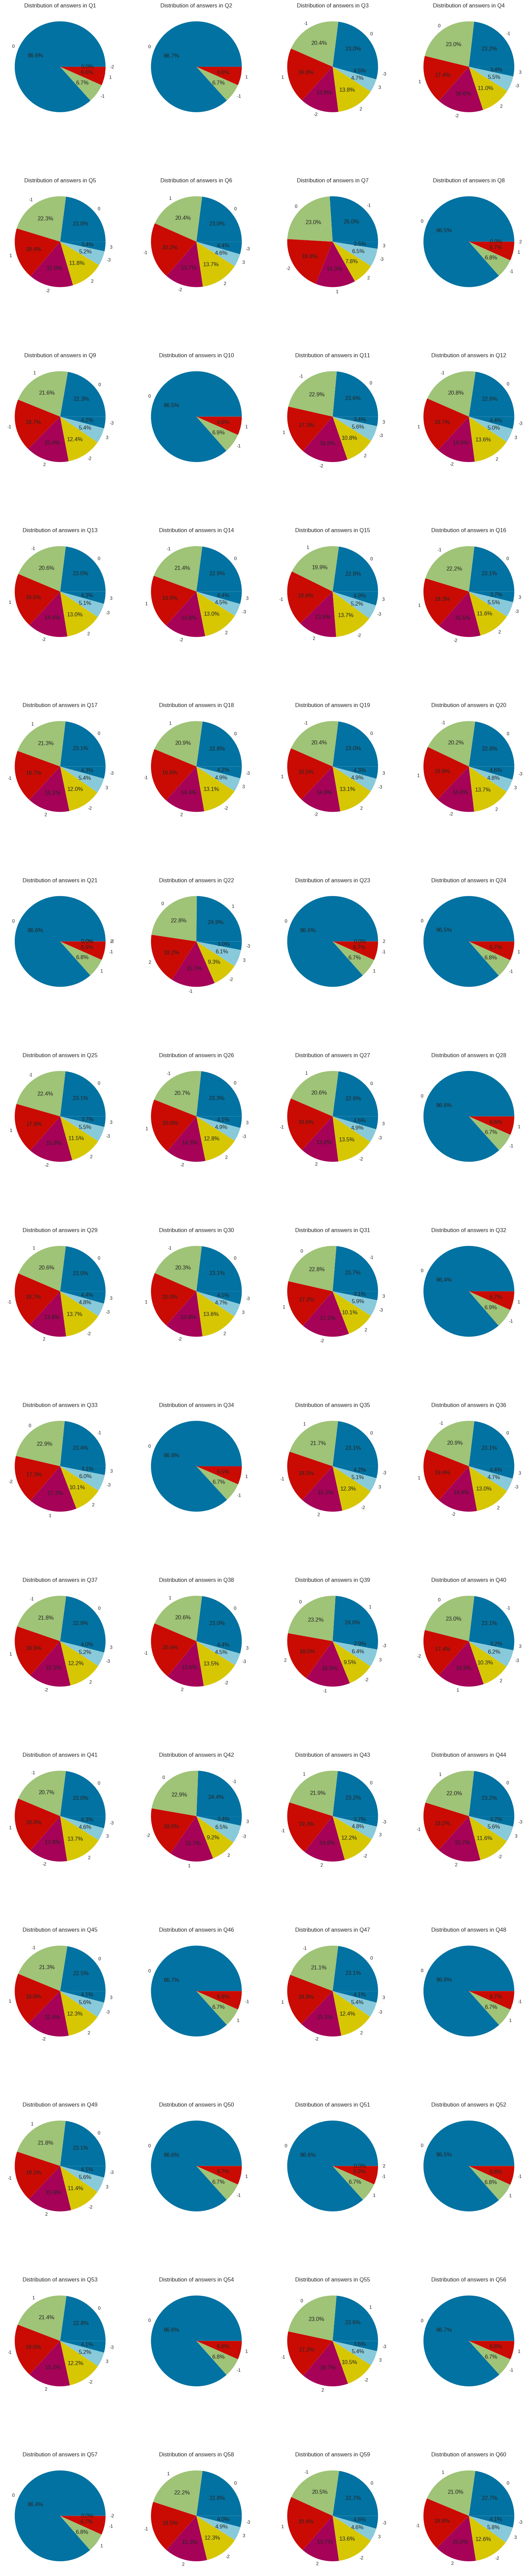

In [115]:
plt.figure(figsize=(20, 100))

for i in range(1, 61):
    question = df.select_dtypes(include='int64').columns[i-1]
    values = df[question].value_counts().values
    labels = df[question].value_counts().index

    plt.subplot(15, 4, i)
    plt.pie(values, labels = labels, autopct="%1.1f%%")

    plt.title(f'Distribution of answers in {question}')

plt.show()

### **Exploring the personality types**

**Finding different personality types**

In [116]:
df['Personality'].unique()

array(['ENFP', 'ISFP', 'INFJ', 'ISTP', 'ENFJ', 'INTJ', 'ENTJ', 'ESFP',
       'INFP', 'INTP', 'ISTJ', 'ENTP', 'ISFJ', 'ESTJ', 'ESTP', 'ESFJ'],
      dtype=object)

**Distribution of personality types in the dataset**

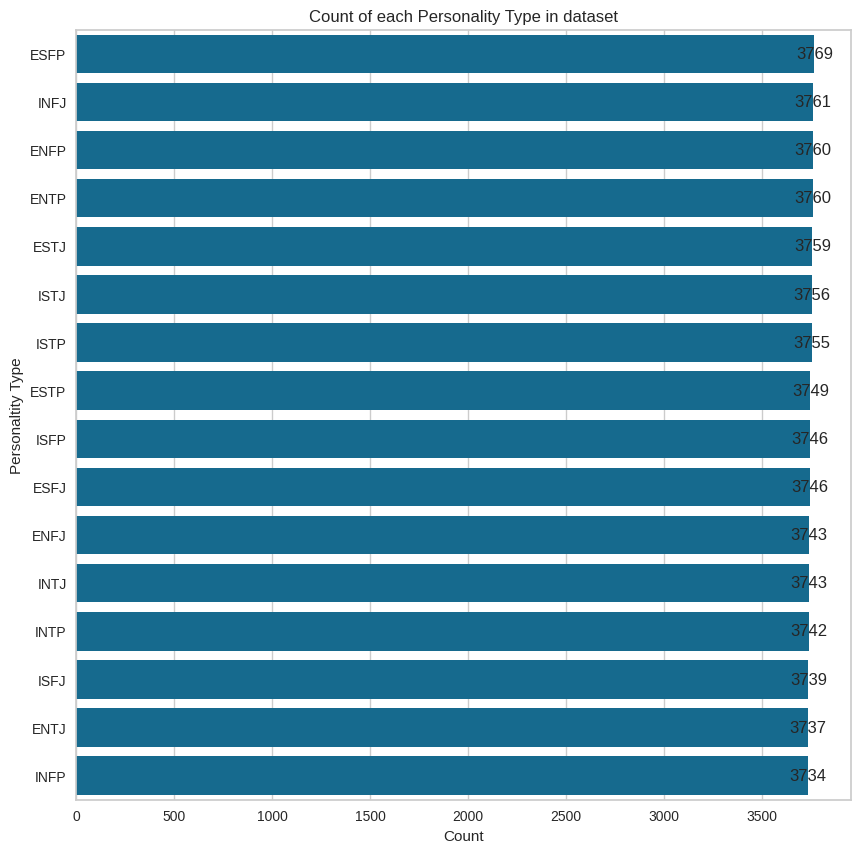

In [117]:
plt.figure(figsize=(10, 10))

sns.barplot(df['Personality'].value_counts(), orient='h')

plt.title('Count of each Personality Type in dataset')
plt.xlabel('Count')
plt.ylabel('Personaltity Type')

for i, count in enumerate(df['Personality'].value_counts()):
    plt.text(count, i, str(count), ha='center', va='center')

plt.show()

**Dividing data into subsets of each personality type**

In [118]:
mbti_dfs = {}

for mbti_type in df['Personality'].unique():
    mbti_dfs[mbti_type] = df[df['Personality'] == mbti_type].drop('Personality', axis=1)

mbti_dfs.keys()

dict_keys(['ENFP', 'ISFP', 'INFJ', 'ISTP', 'ENFJ', 'INTJ', 'ENTJ', 'ESFP', 'INFP', 'INTP', 'ISTJ', 'ENTP', 'ISFJ', 'ESTJ', 'ESTP', 'ESFJ'])

**Agreement and disagreement behaviour to questions**

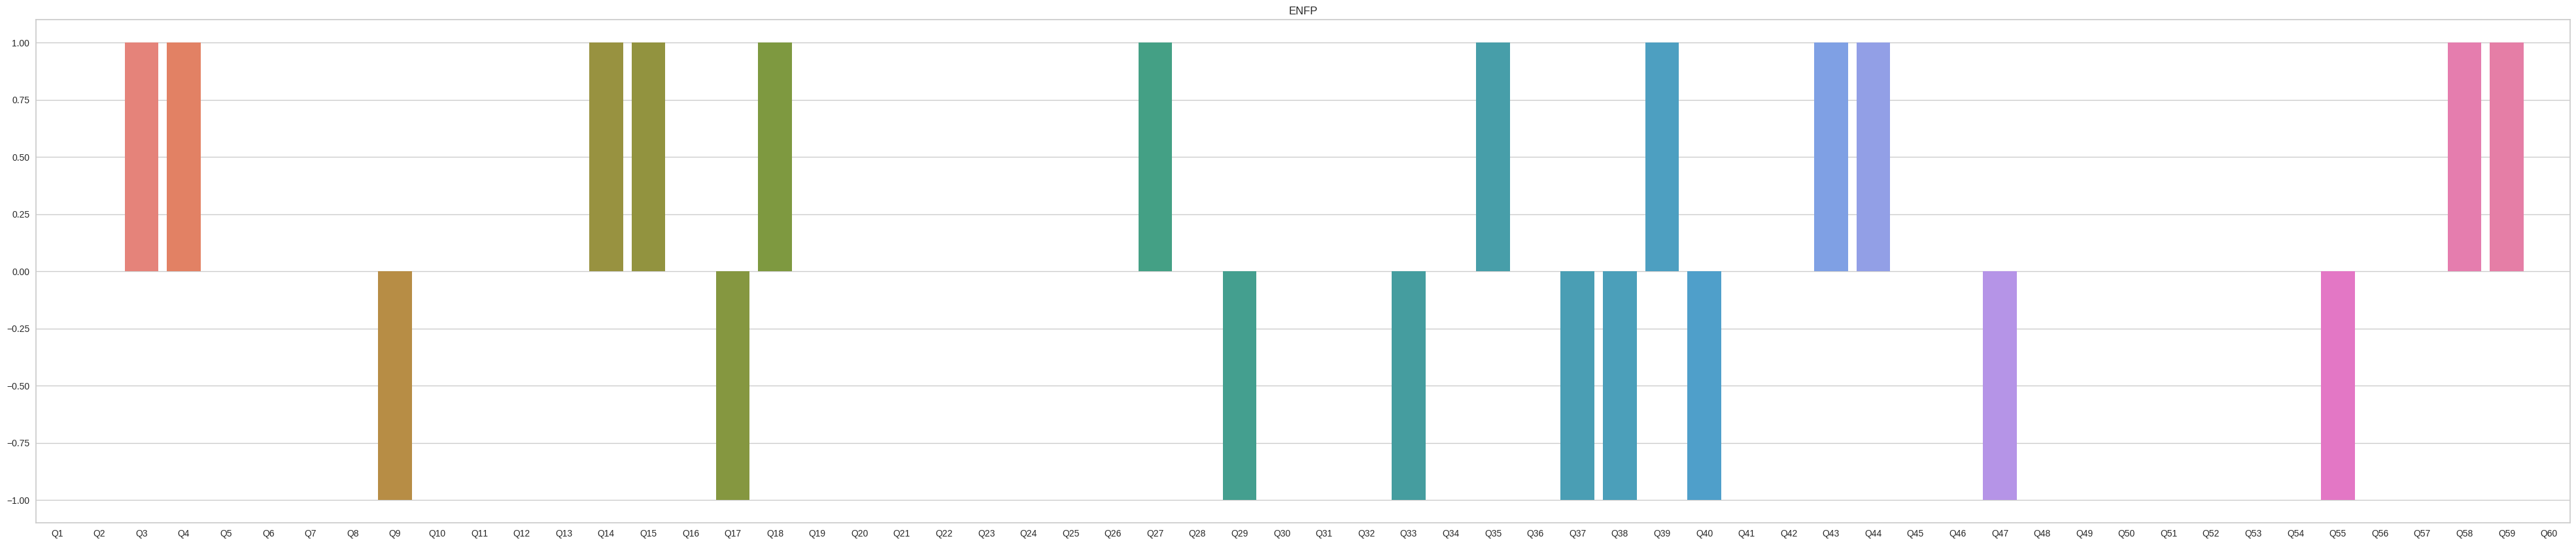

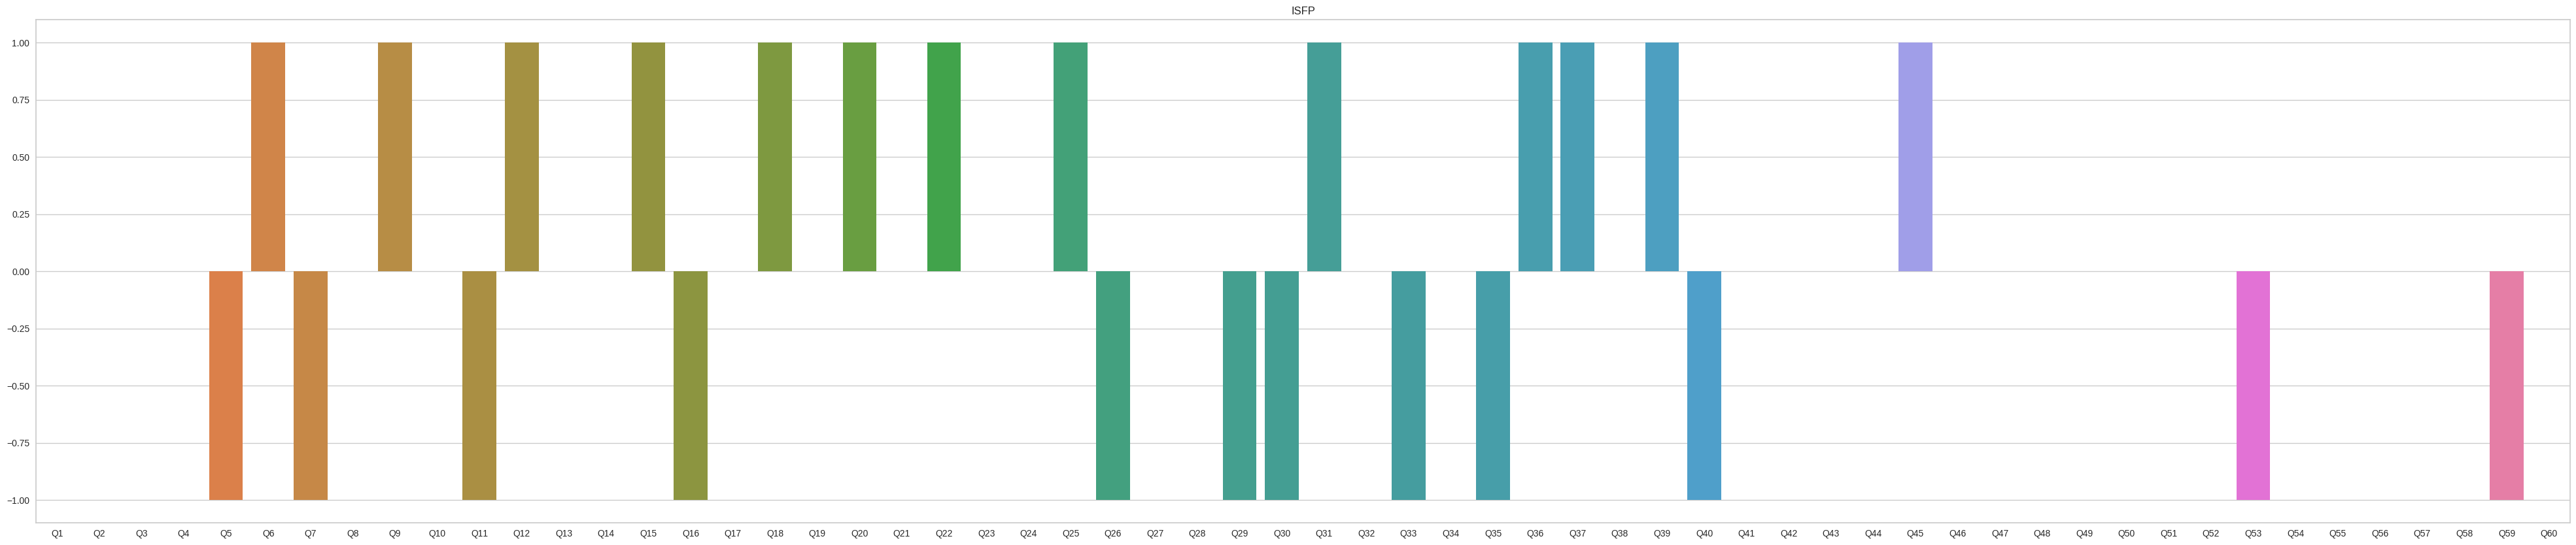

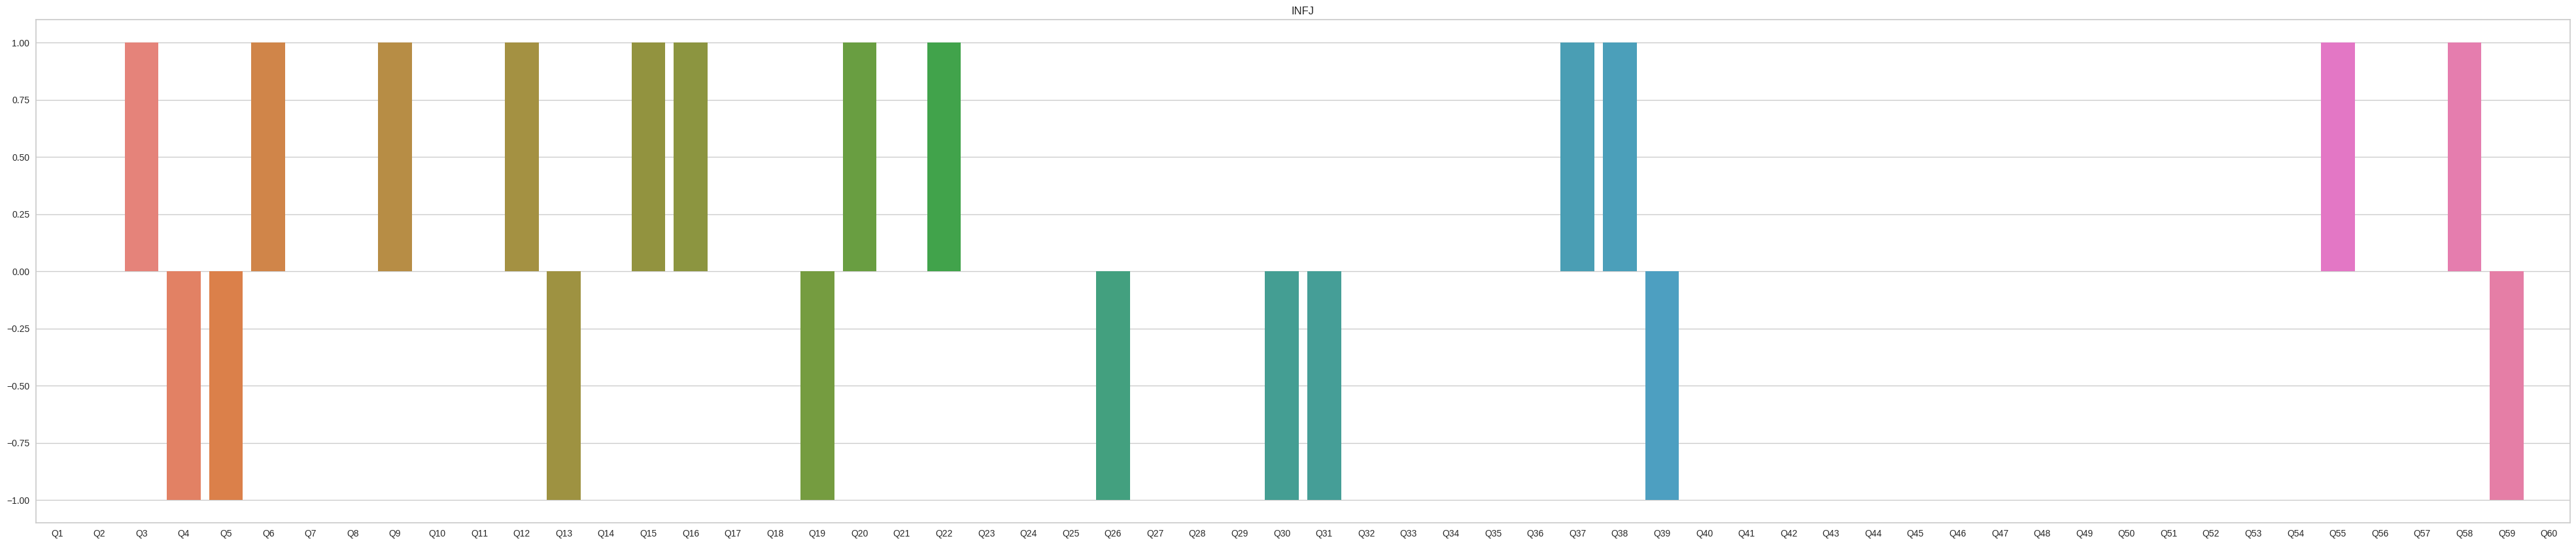

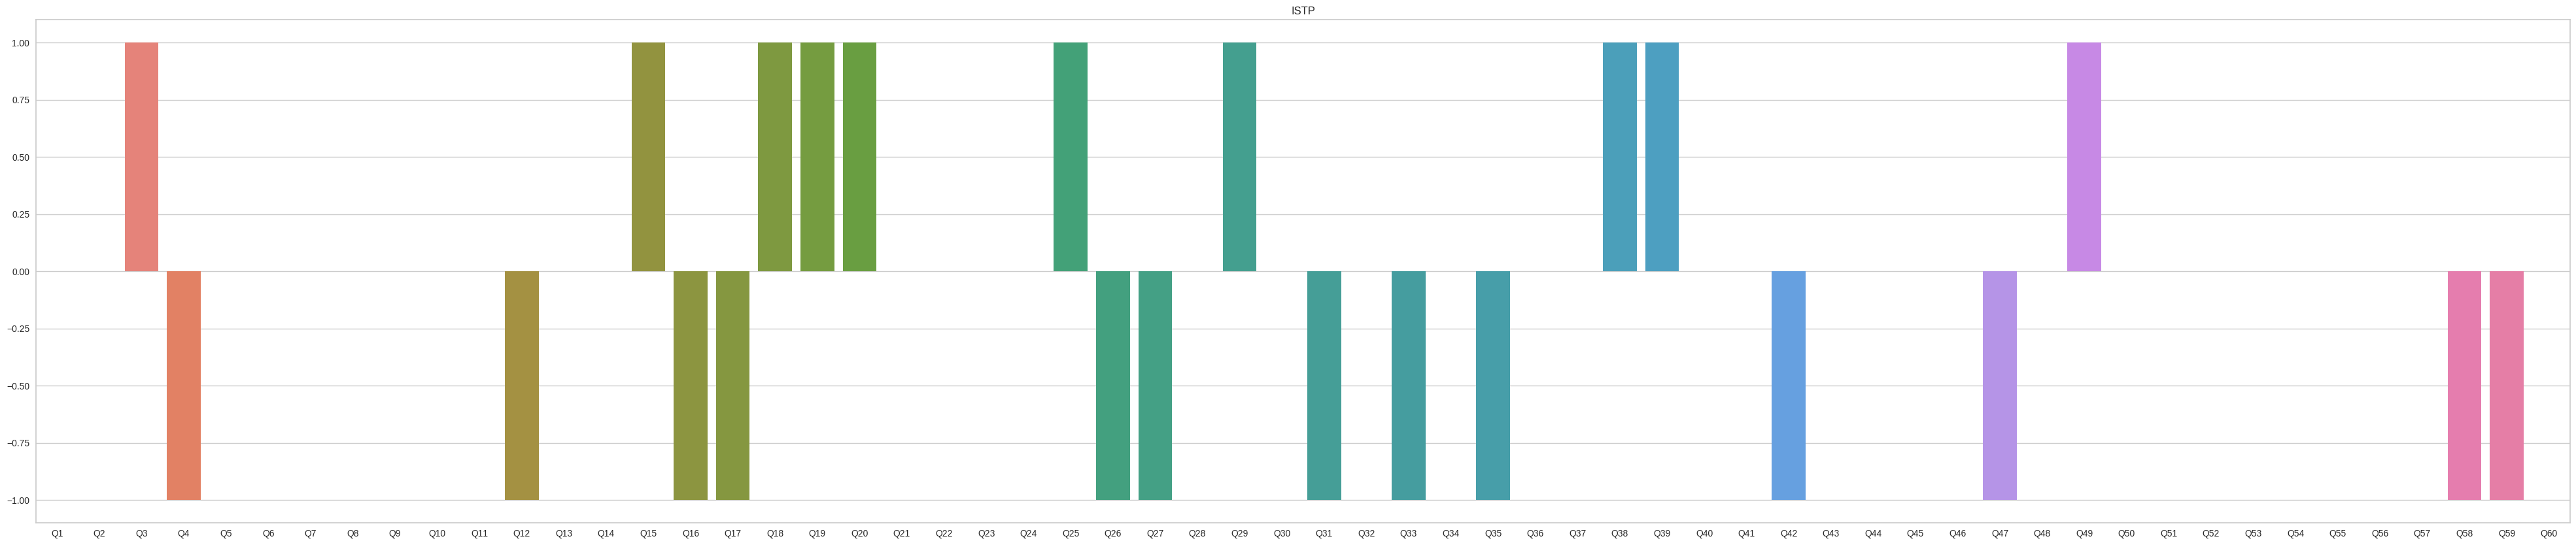

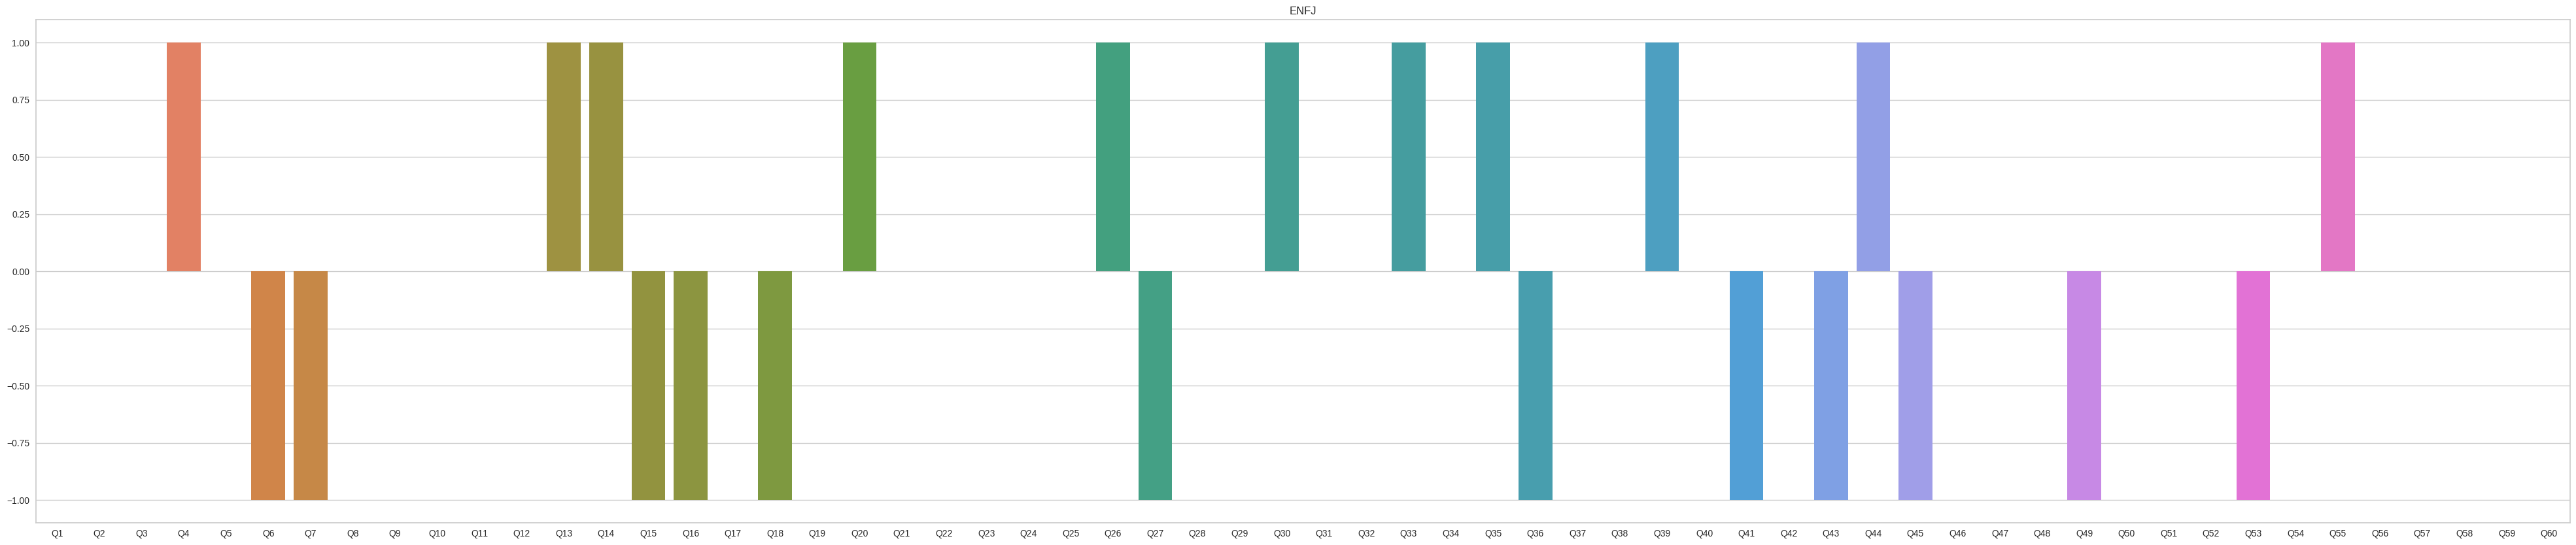

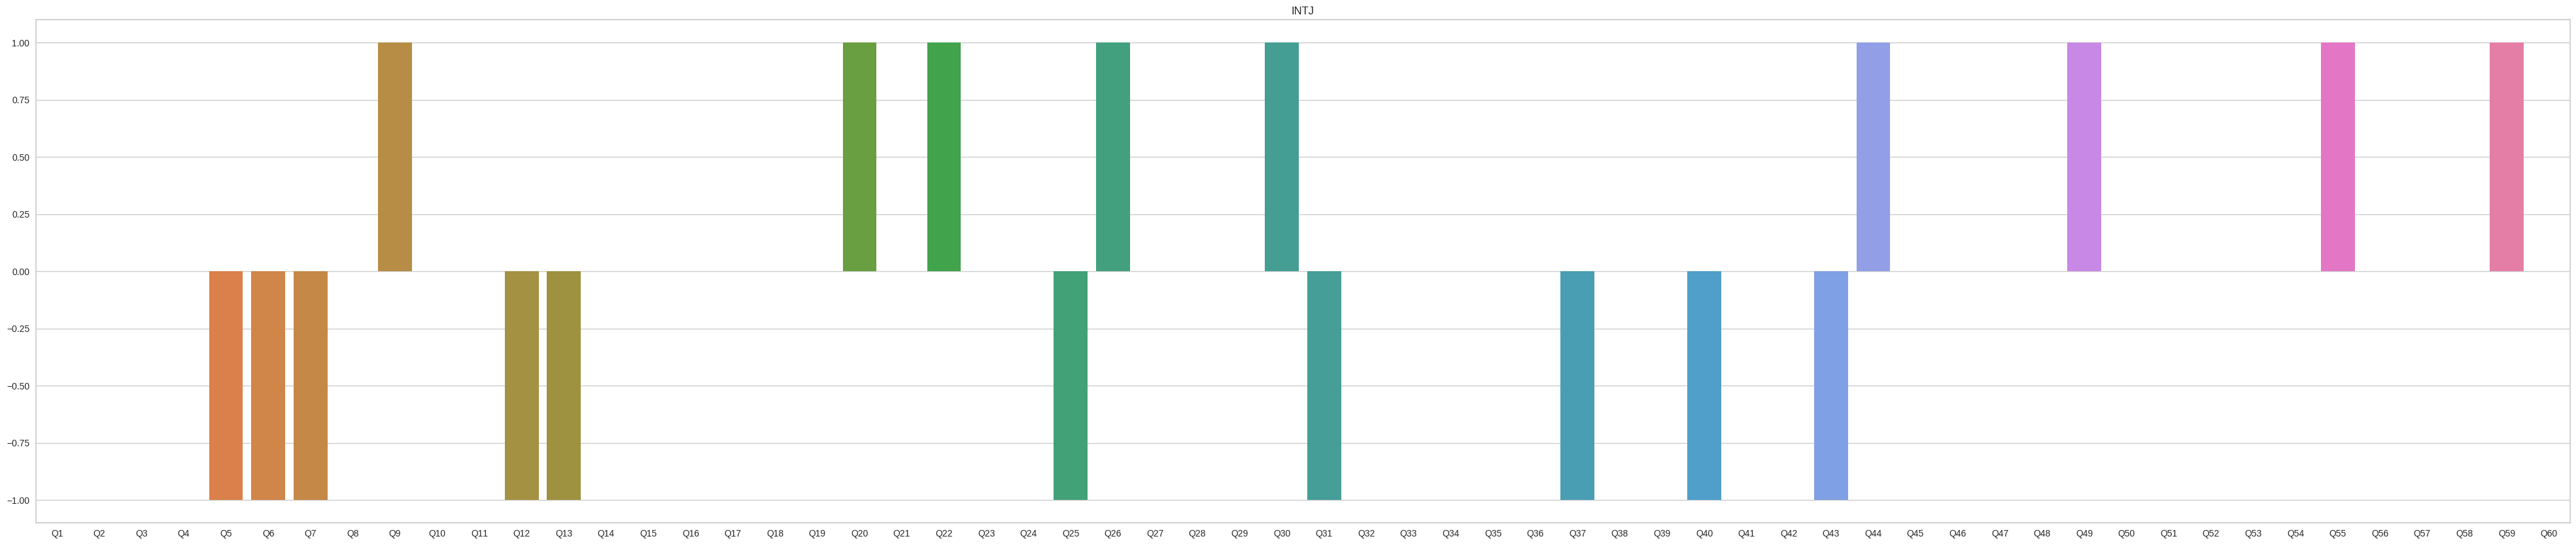

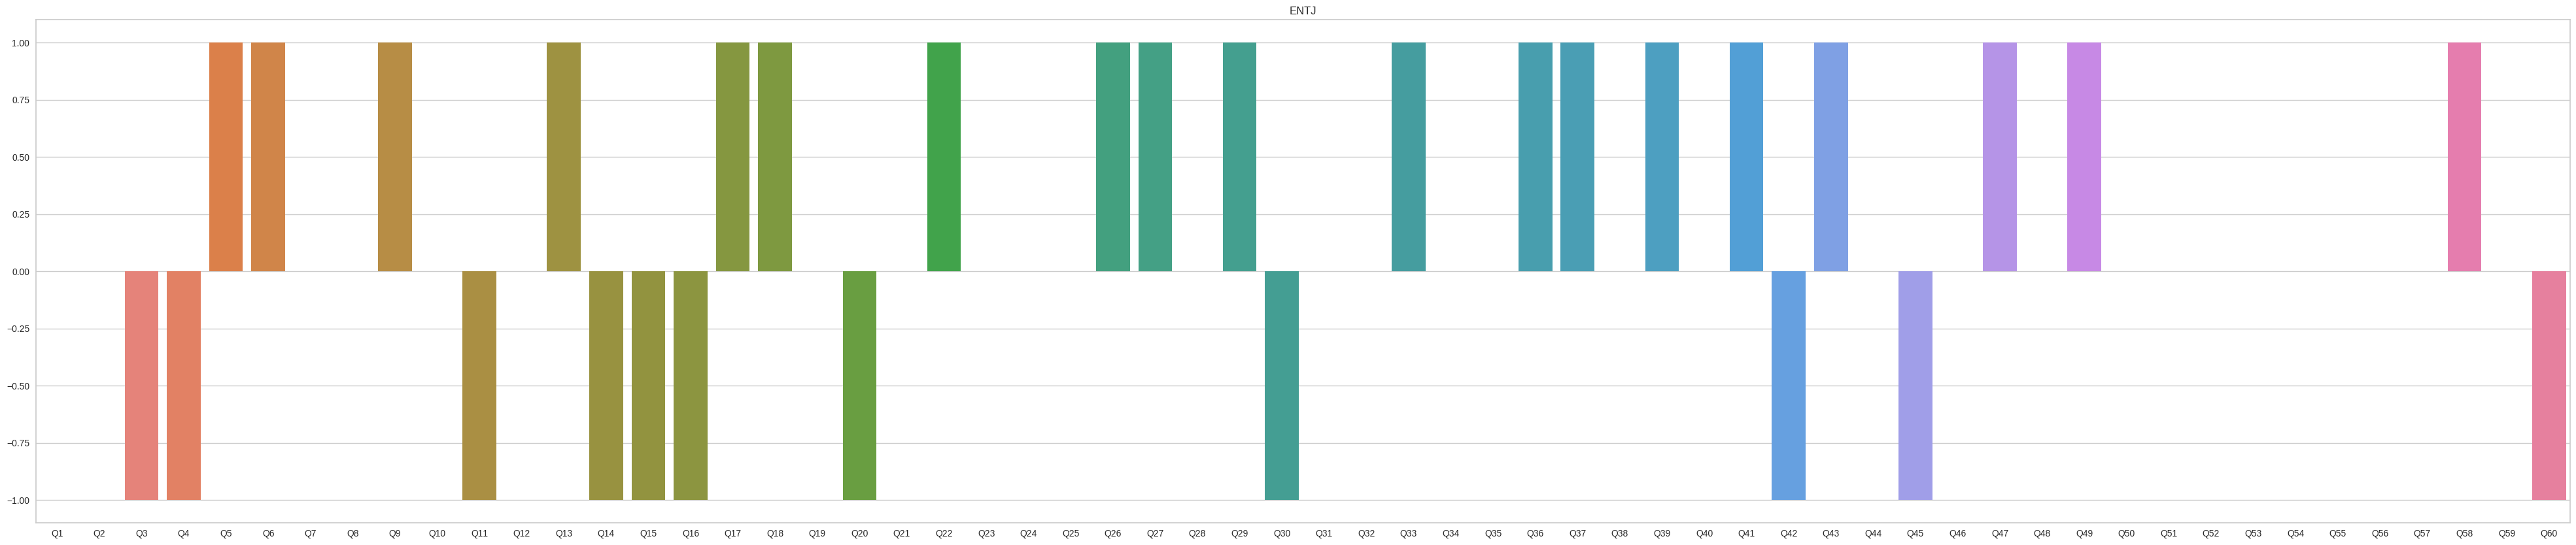

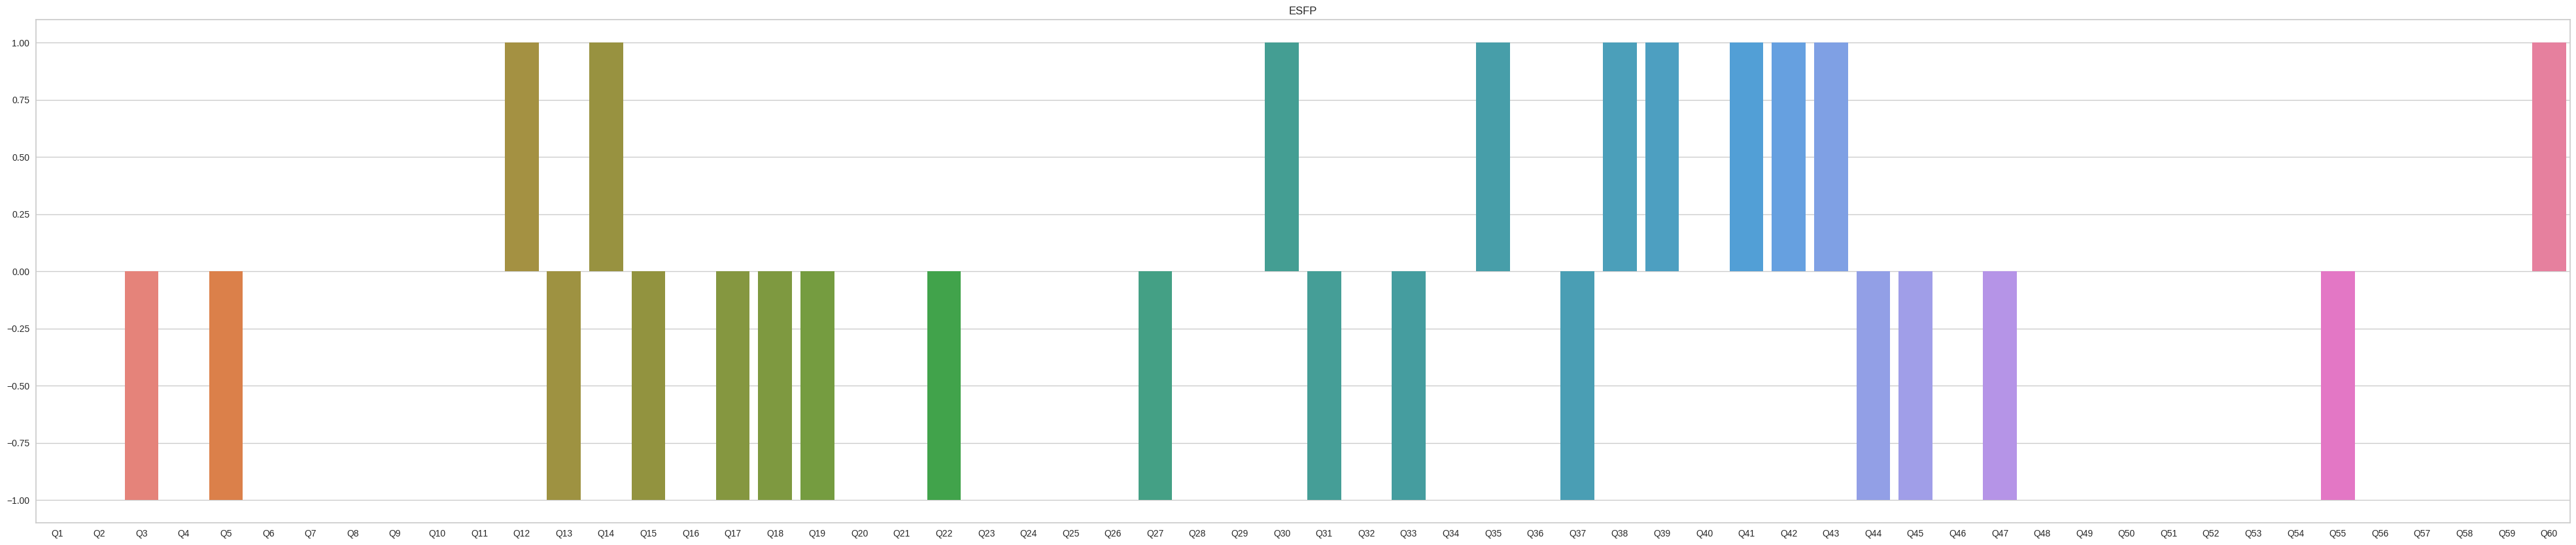

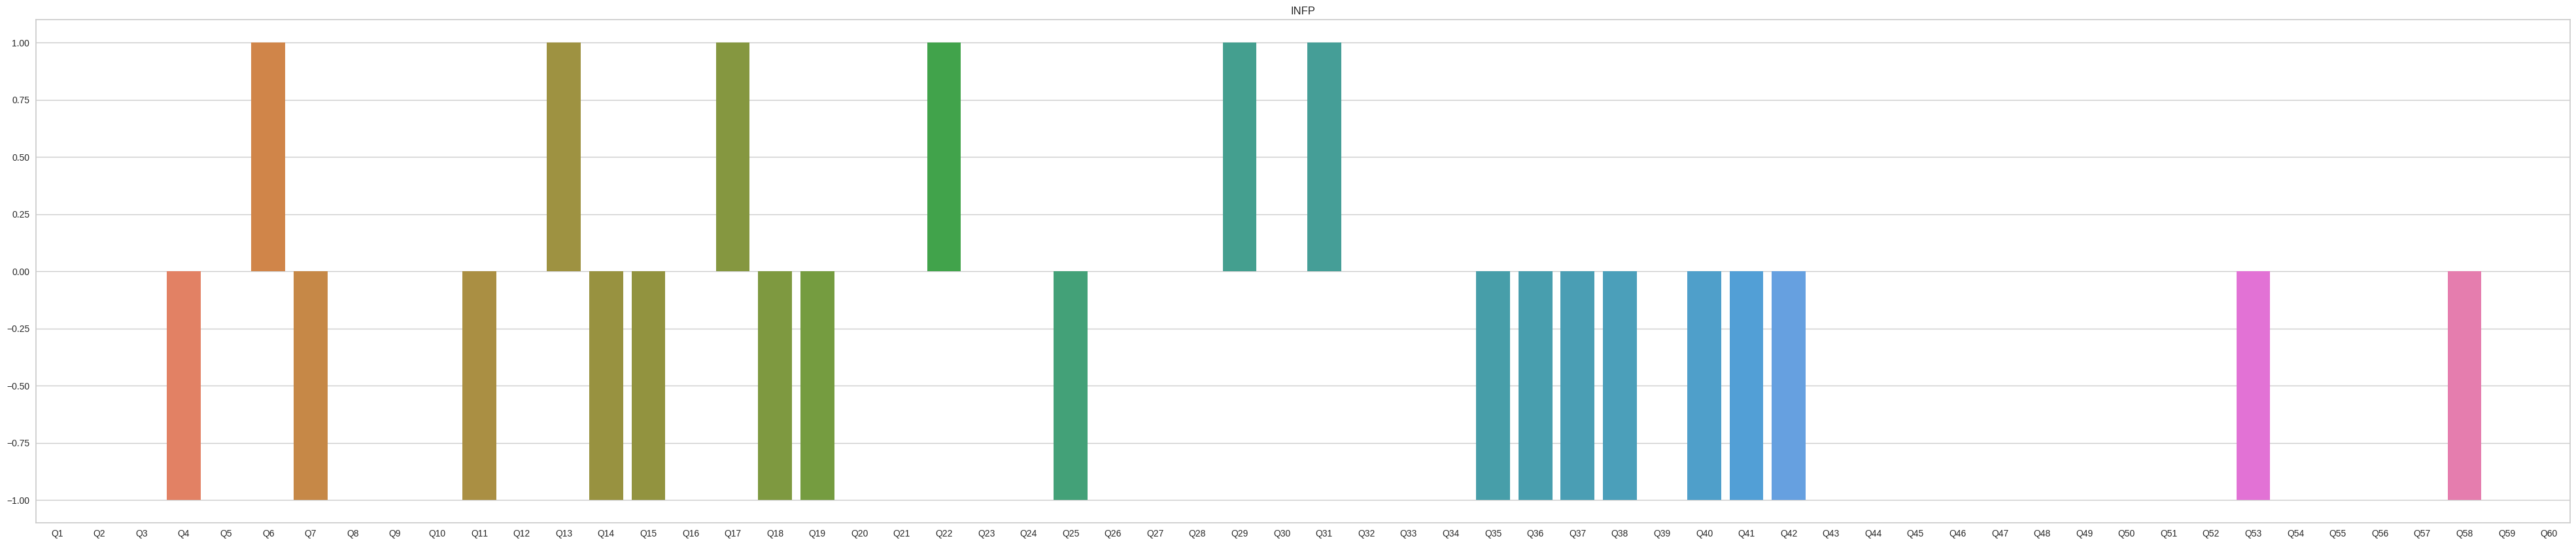

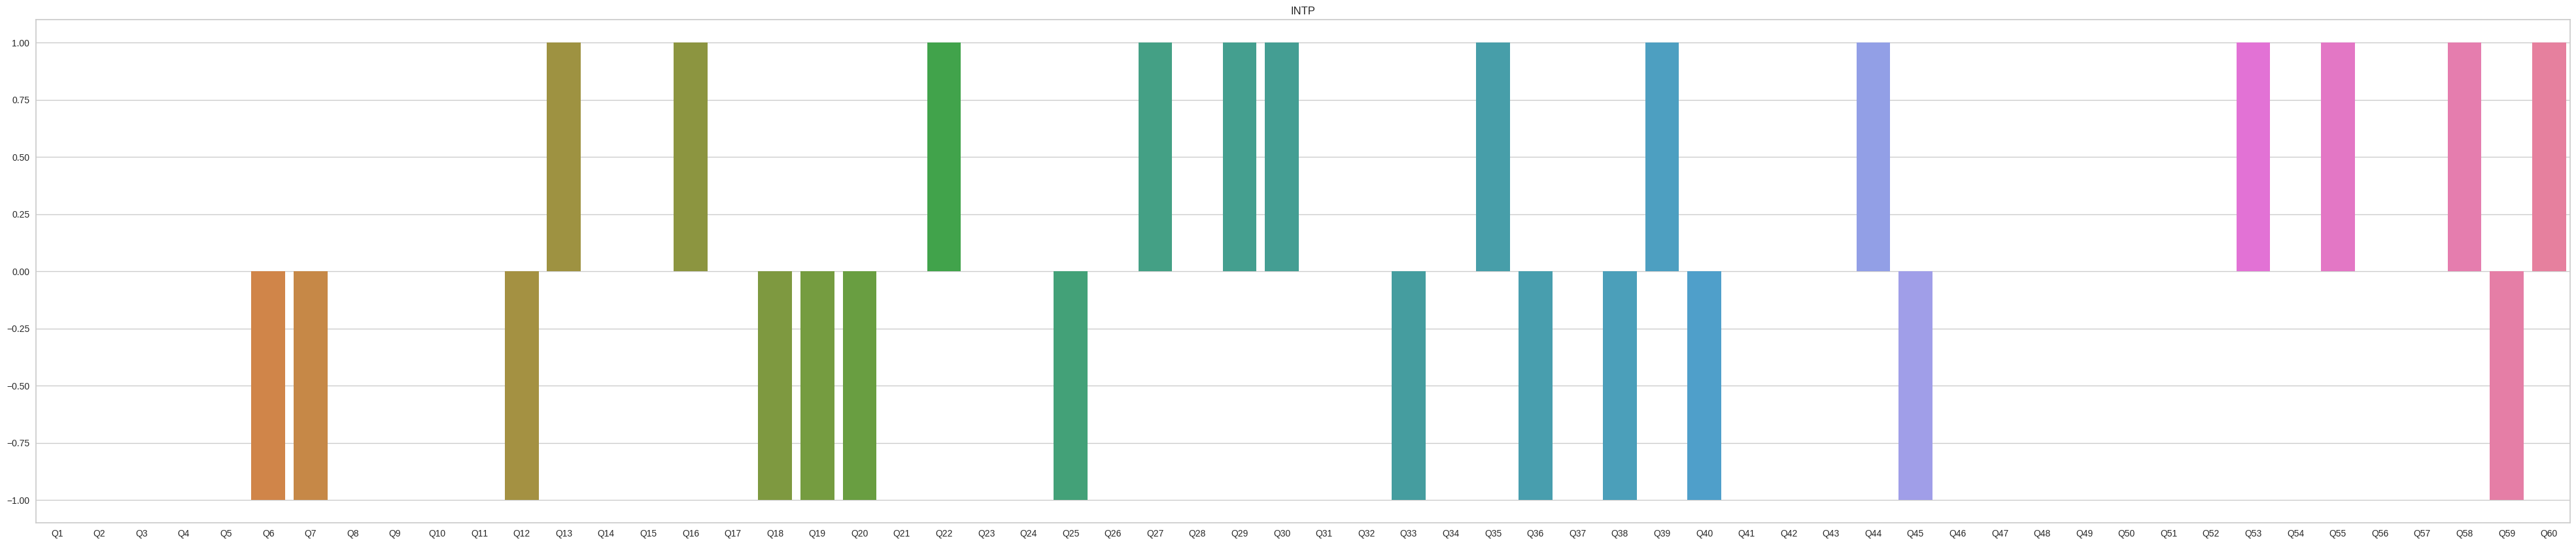

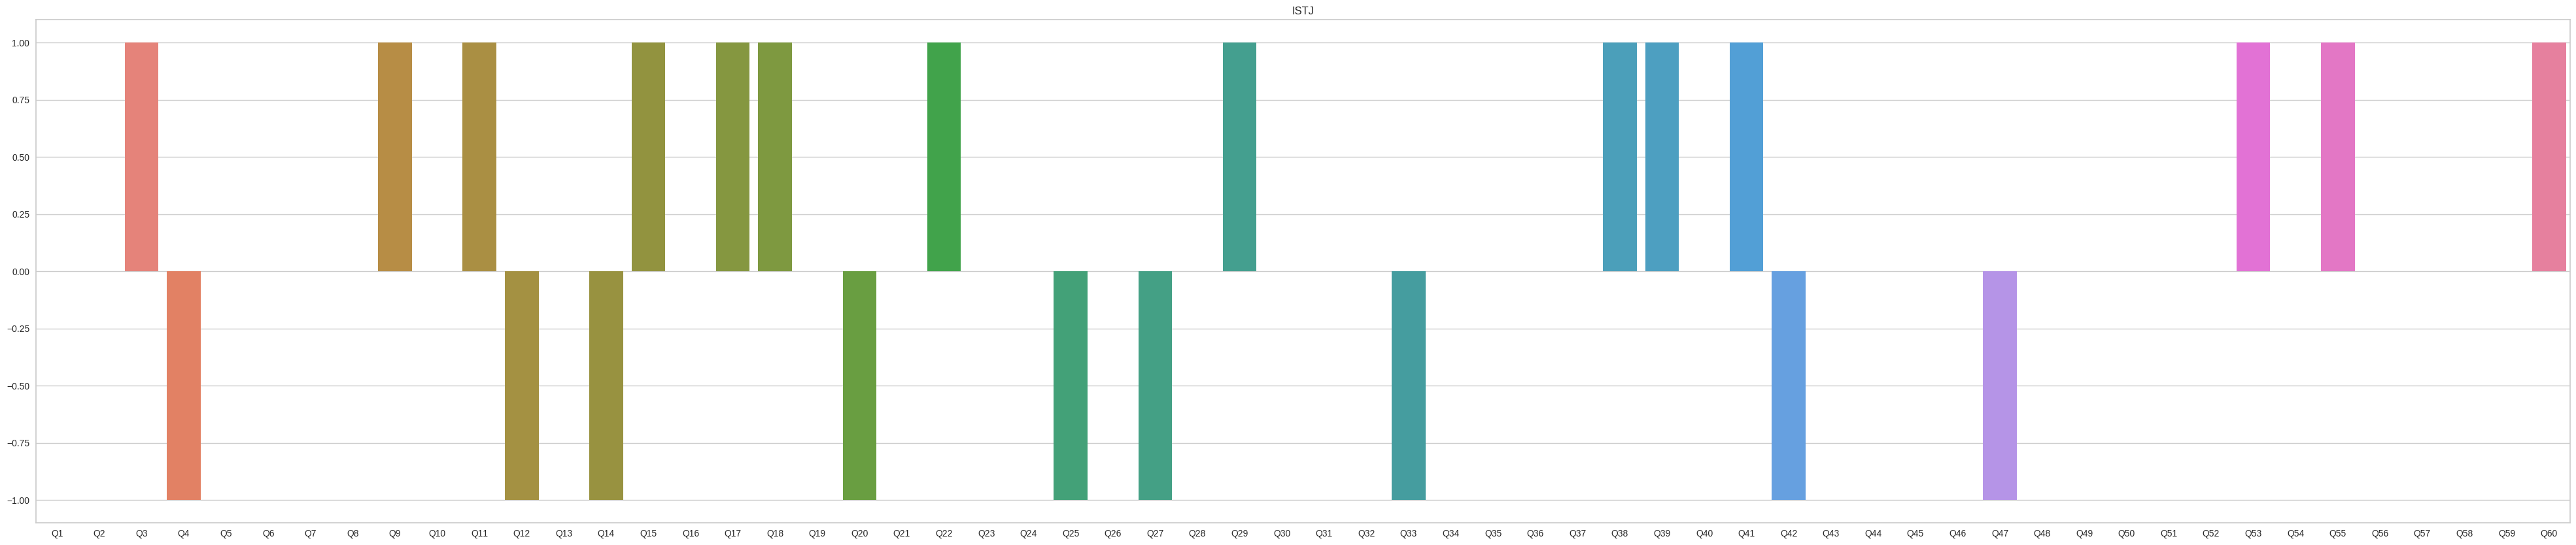

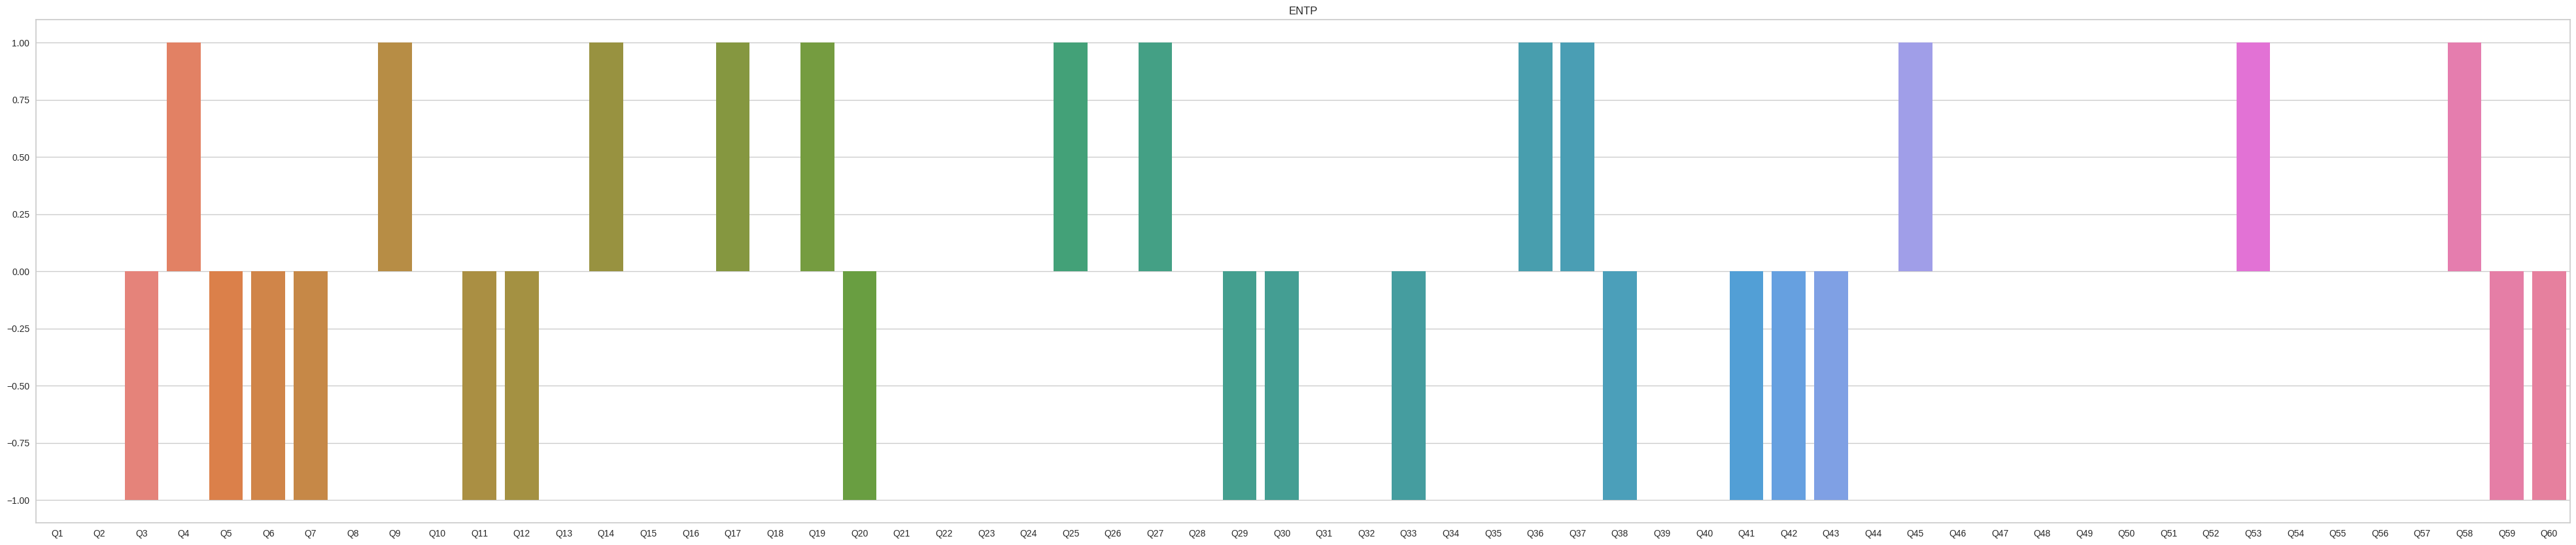

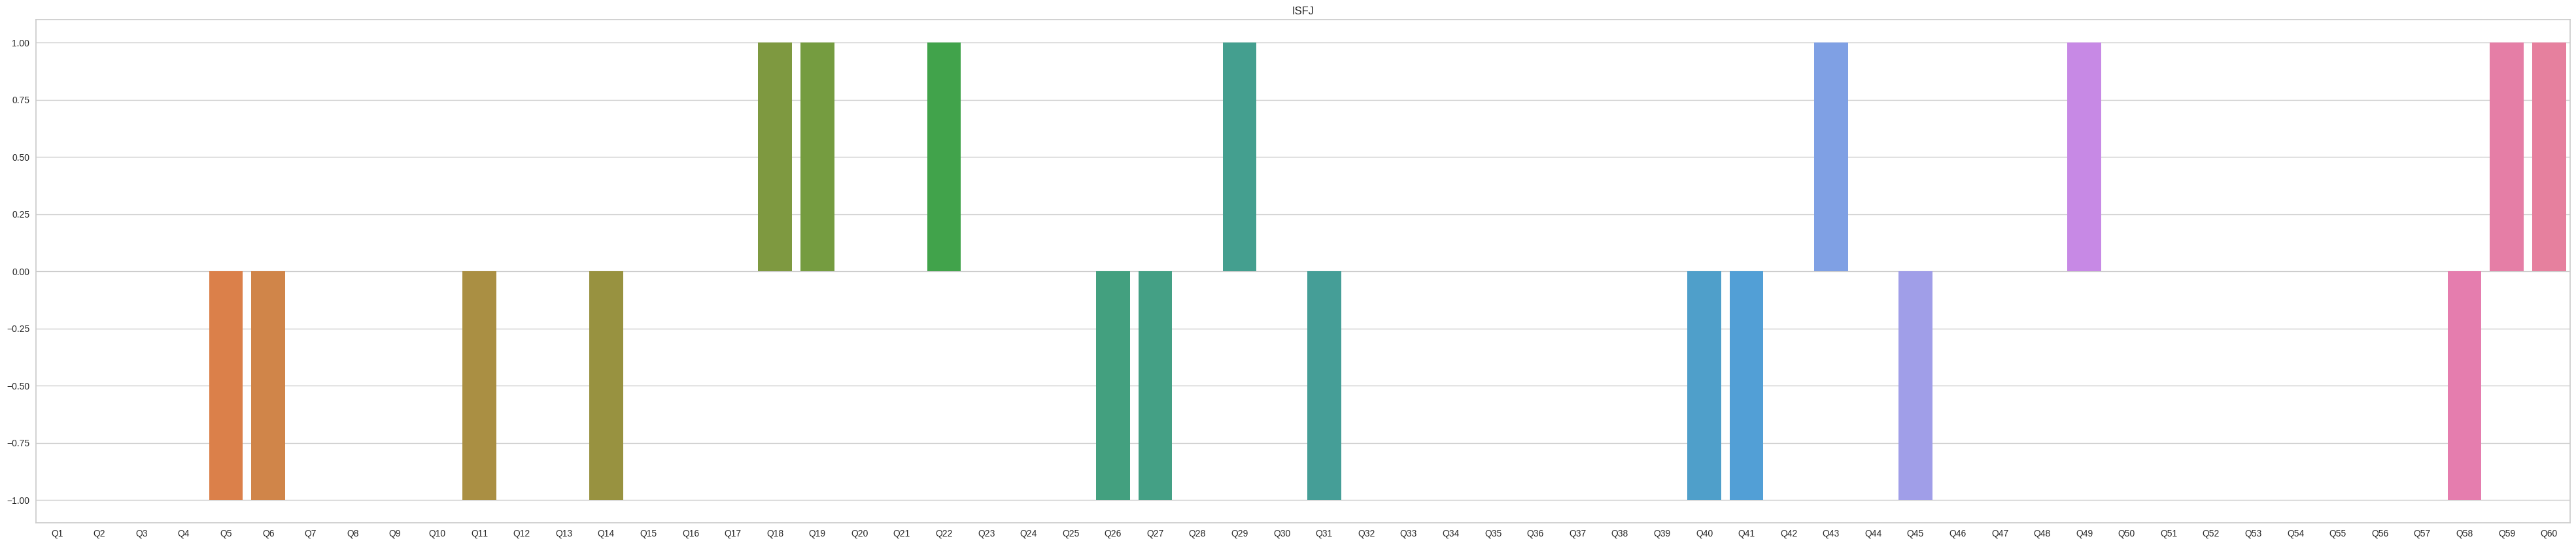

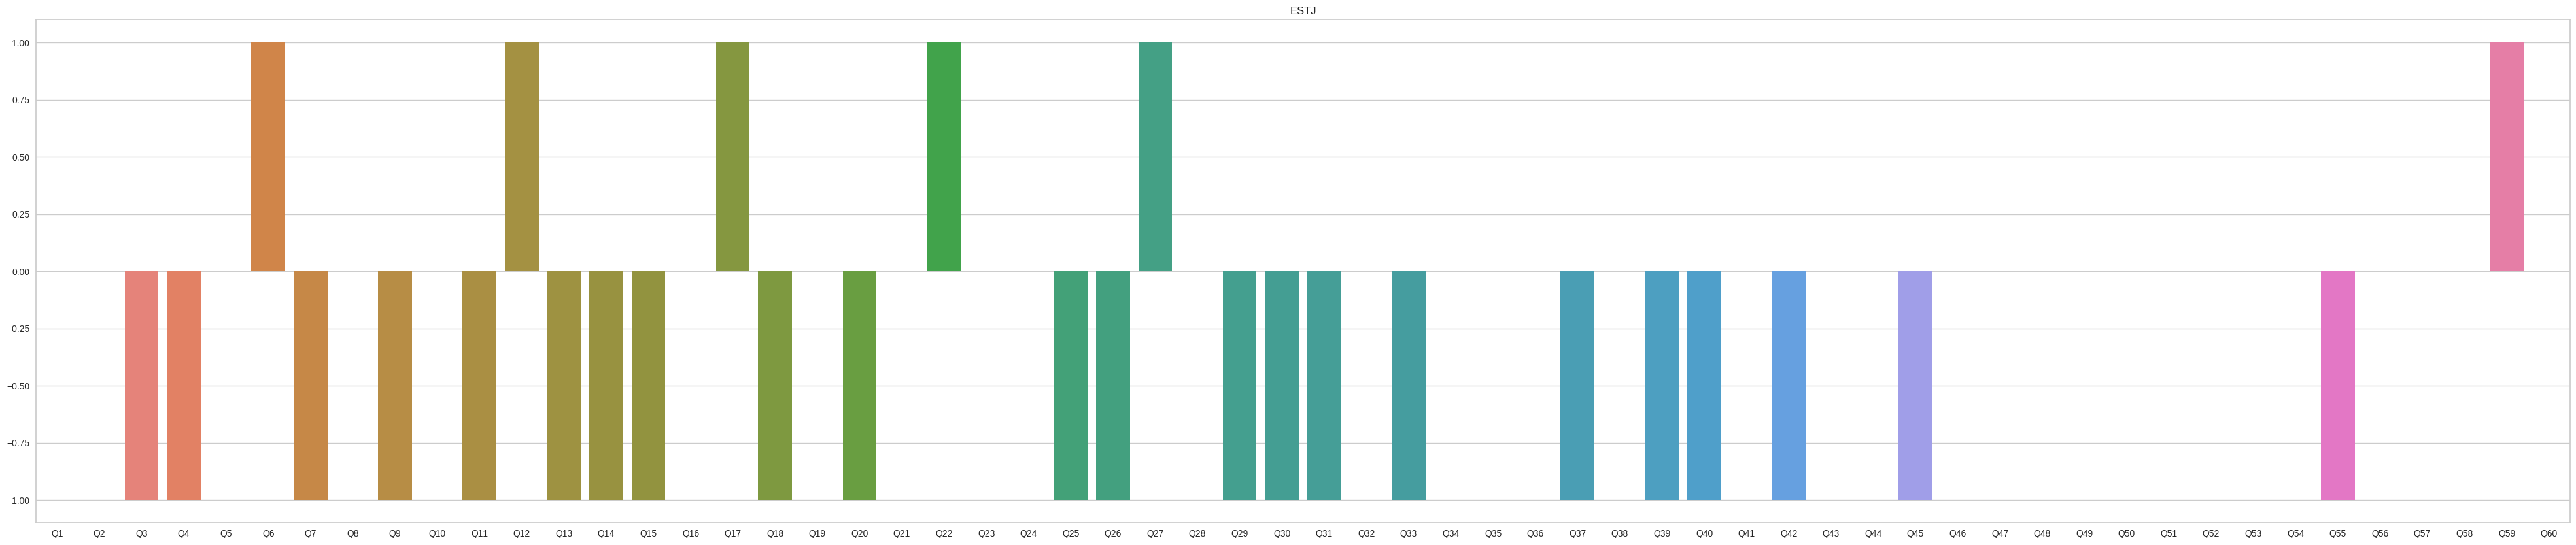

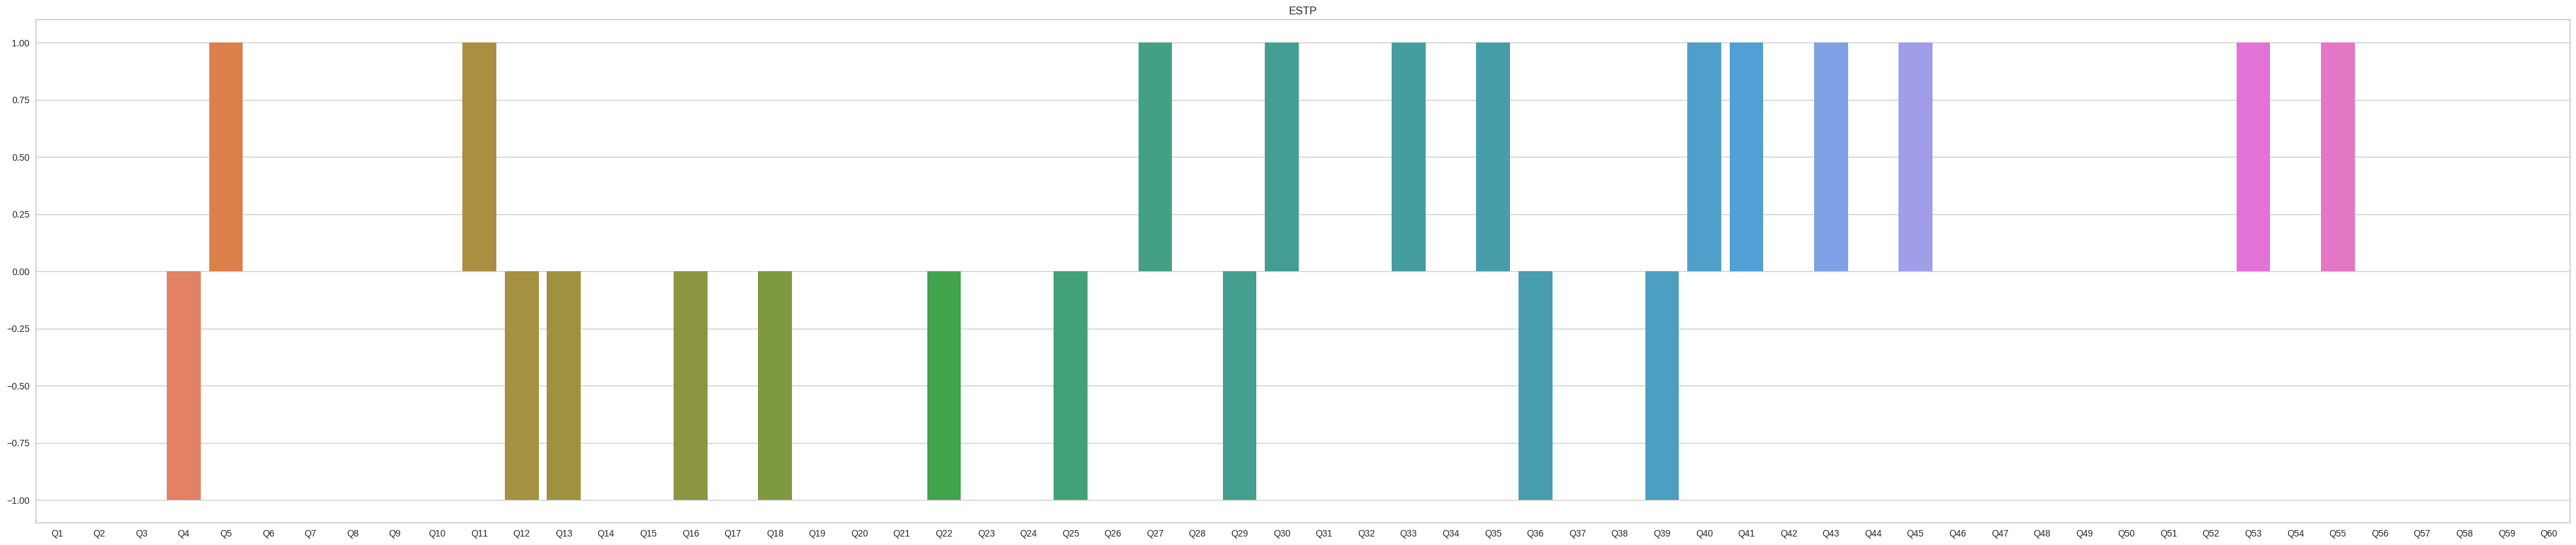

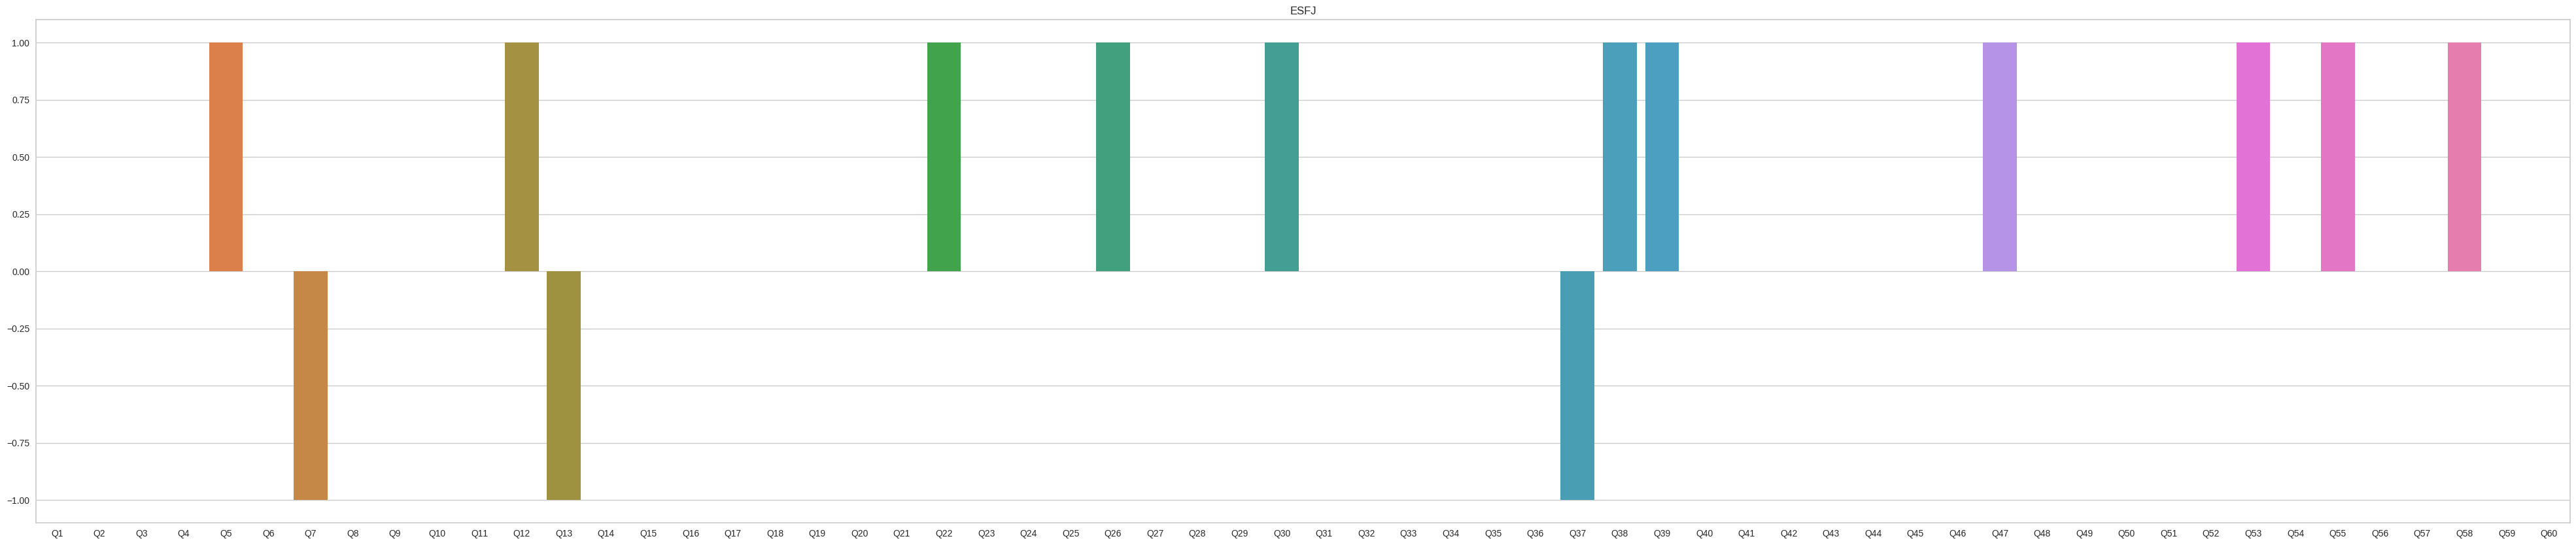

In [119]:
for mbti_type, mbti_df in mbti_dfs.items():
  plt.figure(figsize=(50, 10))
  sns.barplot(mbti_df.mode())
  plt.title(f'{mbti_type}')
  plt.show()

## **Comparative analysis of Classifiers**

**Readying dataset to fit classification models**

In [120]:
x = df.drop('Personality', axis = 1)
y = df['Personality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**Naive Bayes Classifier**

In [121]:
nb = GaussianNB()

%time nb.fit(x_train, y_train)

y_pred_nb = nb.predict(x_test)

print(classification_report(y_test, y_pred_nb))

print('Confusion Matrix is : \n', confusion_matrix(y_test, y_pred_nb))

CPU times: user 282 ms, sys: 913 µs, total: 283 ms
Wall time: 284 ms
              precision    recall  f1-score   support

        ENFJ       0.91      0.92      0.92       772
        ENFP       0.92      0.95      0.93       746
        ENTJ       0.95      0.94      0.95       730
        ENTP       0.97      0.93      0.95       745
        ESFJ       0.84      0.82      0.83       754
        ESFP       0.96      0.94      0.95       768
        ESTJ       0.90      0.93      0.91       707
        ESTP       0.93      0.93      0.93       766
        INFJ       0.93      0.91      0.92       781
        INFP       0.88      0.88      0.88       711
        INTJ       0.83      0.89      0.86       726
        INTP       0.88      0.92      0.90       765
        ISFJ       0.89      0.87      0.88       763
        ISFP       0.93      0.91      0.92       713
        ISTJ       0.89      0.86      0.88       771
        ISTP       0.91      0.91      0.91       782

    accurac

**Random Forest Classifier**

In [122]:
rf = RandomForestClassifier()

%time rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

print(classification_report(y_test, y_pred_rf))

print('Confusion Matrix is : \n', confusion_matrix(y_test, y_pred_rf))

CPU times: user 16.1 s, sys: 23.2 ms, total: 16.1 s
Wall time: 16.2 s
              precision    recall  f1-score   support

        ENFJ       0.96      0.98      0.97       772
        ENFP       0.97      0.99      0.98       746
        ENTJ       0.97      0.98      0.98       730
        ENTP       0.98      0.97      0.97       745
        ESFJ       0.98      0.96      0.97       754
        ESFP       0.99      0.98      0.98       768
        ESTJ       0.96      0.98      0.97       707
        ESTP       0.98      0.98      0.98       766
        INFJ       0.98      0.97      0.97       781
        INFP       0.97      0.97      0.97       711
        INTJ       0.97      0.97      0.97       726
        INTP       0.96      0.98      0.97       765
        ISFJ       0.98      0.96      0.97       763
        ISFP       0.98      0.97      0.97       713
        ISTJ       0.97      0.97      0.97       771
        ISTP       0.97      0.98      0.98       782

    accura

**Support Vector Machine Classifier**

In [123]:
svm = SVC()

%time svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)

print(classification_report(y_test, y_pred_svm))

print('Confusion Matrix is : \n', confusion_matrix(y_test, y_pred_svm))

CPU times: user 44.7 s, sys: 43.6 ms, total: 44.8 s
Wall time: 45.1 s
              precision    recall  f1-score   support

        ENFJ       0.98      0.99      0.99       772
        ENFP       0.99      1.00      0.99       746
        ENTJ       0.98      0.99      0.99       730
        ENTP       0.99      0.99      0.99       745
        ESFJ       0.99      0.98      0.99       754
        ESFP       1.00      0.99      0.99       768
        ESTJ       0.99      0.99      0.99       707
        ESTP       0.99      0.99      0.99       766
        INFJ       0.99      0.99      0.99       781
        INFP       0.99      0.99      0.99       711
        INTJ       0.98      0.99      0.98       726
        INTP       0.98      0.99      0.99       765
        ISFJ       0.99      0.99      0.99       763
        ISFP       0.99      0.98      0.99       713
        ISTJ       0.99      0.99      0.99       771
        ISTP       0.99      0.99      0.99       782

    accura

### **Analysing performance**

**Creating dataset of performance metrics for each classifier**

In [124]:
data = {
    'Classifier': ['NB', 'RF', 'SVM'],

        'Accuracy': [accuracy_score(y_test, y_pred_nb),
                  accuracy_score(y_test, y_pred_rf),
                  accuracy_score(y_test, y_pred_svm)],

        'F1 Score': [f1_score(y_test, y_pred_nb, average='weighted'),
                  f1_score(y_test, y_pred_rf, average='weighted'),
                  f1_score(y_test, y_pred_svm, average='weighted')],

        'Precision': [precision_score(y_test, y_pred_nb, average='weighted'),
                  precision_score(y_test, y_pred_rf, average='weighted'),
                  precision_score(y_test, y_pred_svm, average='weighted')],

        'Recall': [recall_score(y_test, y_pred_nb, average='weighted'),
                  recall_score(y_test, y_pred_rf, average='weighted'),
                  recall_score(y_test, y_pred_svm, average='weighted')]
    }

comparison = pd.DataFrame(data)

comparison.head()

,Classifier,Accuracy,F1 Score,Precision,Recall
0,NB,0.907250,0.907293,0.907813,0.907250
1,RF,0.973833,0.973830,0.973907,0.973833
2,SVM,0.988500,0.988502,0.988522,0.988500


**Visualising performance comparison**

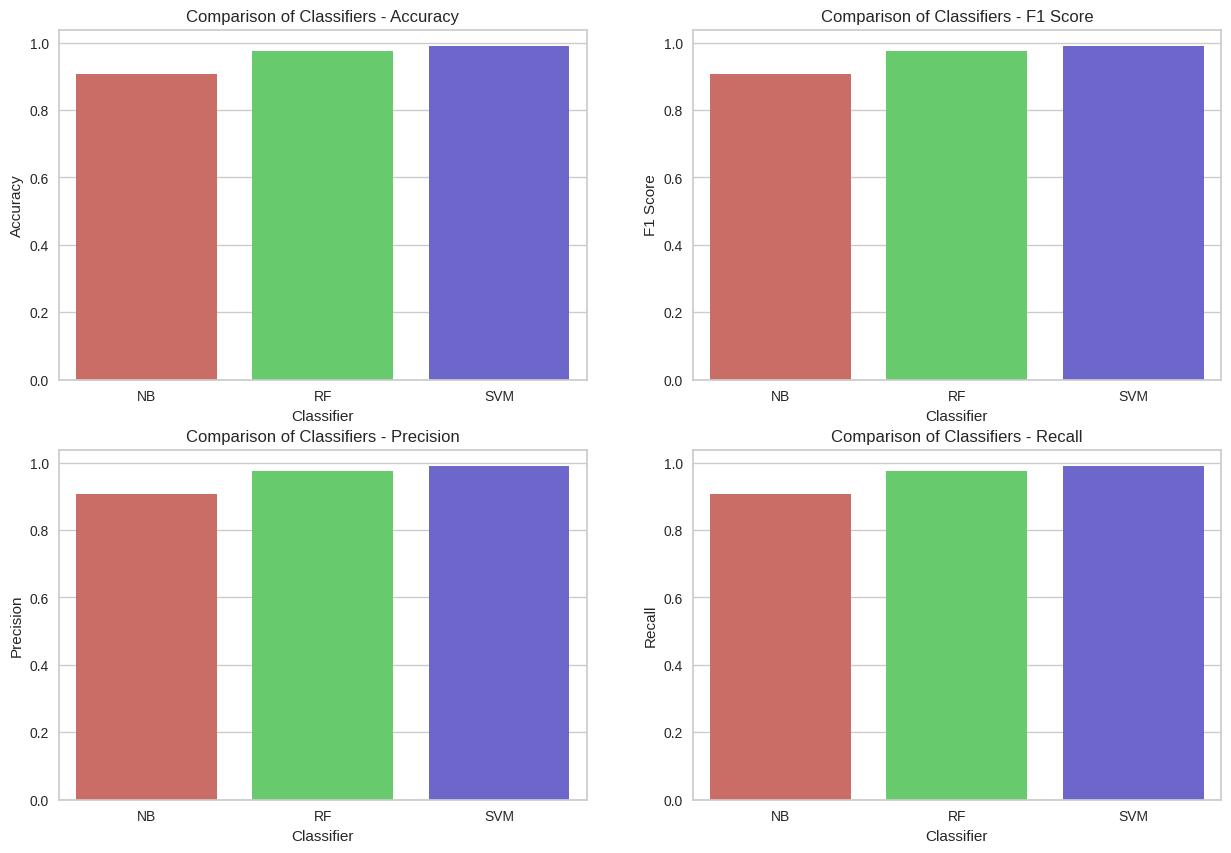

In [125]:
plt.figure(figsize=(15, 10))

for i in range(1, 5):
  plt.subplot(2, 2, i)
  sns.barplot(data = comparison, x = 'Classifier', y = comparison.columns[i], hue = 'Classifier', palette = sns.color_palette("hls", 3))
  plt.title(f'Comparison of Classifiers - {comparison.columns[i]}')
  plt.ylabel(f'{comparison.columns[i]}')
  plt.xlabel('Classifier')

plt.show()

SVM performs the best, however, is slow

## **Effect of PCA**

In [126]:
pca = PCA(n_components=60)

pca_data = pd.DataFrame(pca.fit_transform(df.drop('Personality', axis = 1)))
pca_data['Personality'] = df['Personality']

**Variance analysis of principal components**

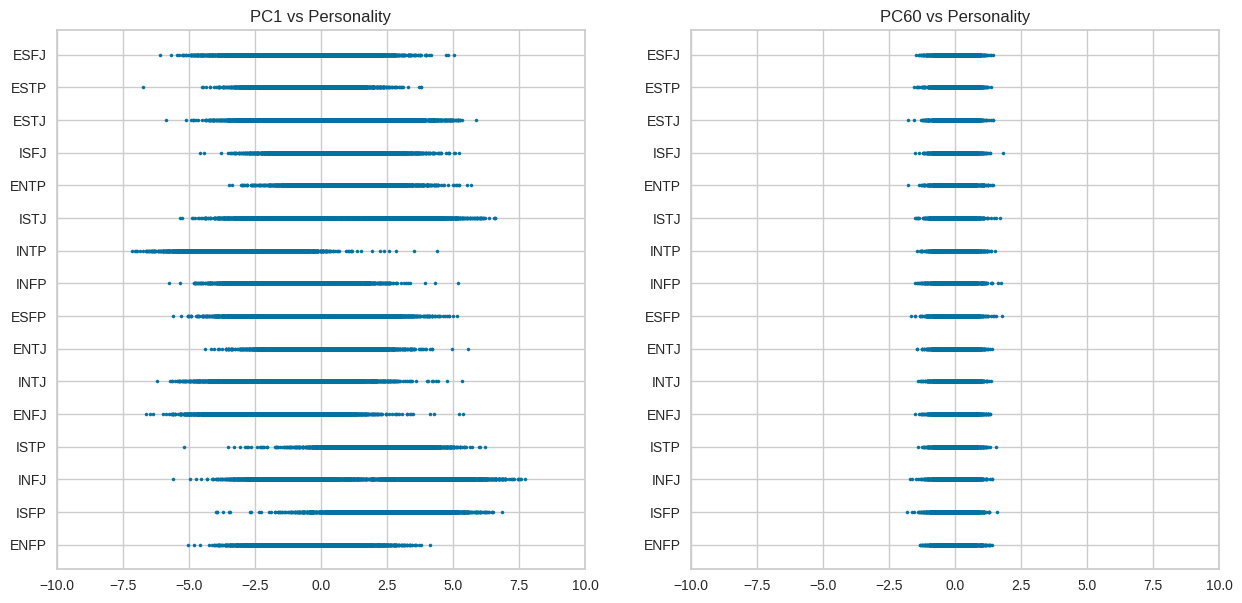

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].scatter(pca_data[0], pca_data['Personality'], s=5)
axes[0].set_title('PC1 vs Personality')

axes[1].scatter(pca_data[59], pca_data['Personality'], s=5)
axes[1].set_title('PC60 vs Personality')

for ax in axes.flat:
    ax.set_xlim([-10, 10])

plt.show()

<Axes: >

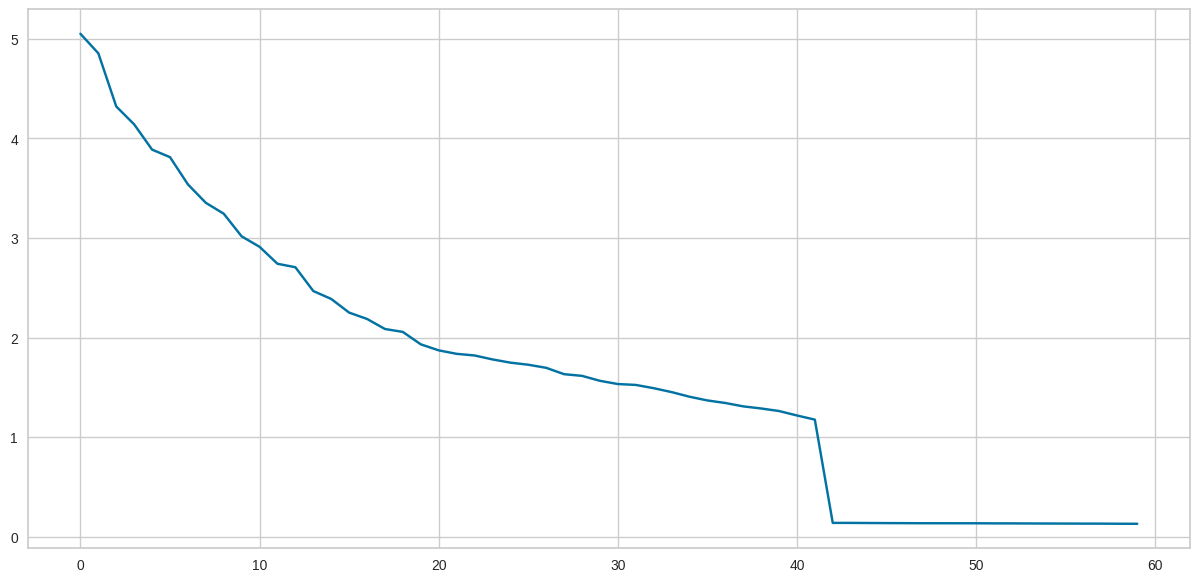

In [128]:
plt.figure(figsize=(15, 7))
sns.lineplot(pca_data.var())

Initial principal components hold the most variance.<br>Here there is a sharp drop in variance around PC40.<br>Components after PC20 have variance below 2 and are discarded to reduce dimension.

**Selecting top 20 PC to reduce dimension**

In [129]:
pca_data = pca_data.drop(columns=list(range(20, 60)), axis = 1)
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Personality
0,0.374203,-0.300671,-0.436082,0.705676,0.930674,0.431795,0.828343,0.443363,1.280505,1.600167,...,1.271462,0.971666,-0.137368,-0.584707,0.425745,-0.708444,-0.070750,0.146418,0.085824,ENFP
1,1.765843,-0.990534,-0.046150,-4.275678,-3.945429,-2.933804,1.728498,0.973543,0.383366,0.627433,...,0.281629,-0.738884,0.970294,-1.411357,-1.641202,-0.323596,-3.568464,-0.312484,-2.947771,ISFP
2,3.065376,2.520874,-0.890764,-0.156732,-0.022120,2.633818,-1.918146,-0.461258,0.379038,2.785099,...,-0.556426,-2.804038,-0.929044,0.922112,-0.943635,0.571133,0.673864,-0.206063,-0.962694,INFJ
3,0.434978,1.468385,3.508878,-1.788127,2.387944,-0.728006,1.706224,2.590278,-1.358830,0.493731,...,-0.899934,1.222725,0.015465,0.198566,-0.969345,-2.924270,2.186762,-0.401240,-0.423021,ISTP
4,-3.338404,0.942098,1.500270,0.028272,1.483605,2.052157,3.619188,0.727700,-0.882098,0.758968,...,-1.455306,-3.344268,1.161252,-1.374477,0.204689,0.272427,-0.689803,1.429026,-0.295174,ENFJ


**Function to fit a model and measure its performance**

In [130]:
def knn_classifier(dataset, label='Personality'):
  x = dataset.drop(label, axis = 1)
  y = dataset[label]

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

  model = KNeighborsClassifier()

  start = time.time()

  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))

  end = time.time()

  print(f"Time to run: {end - start}")

**Comparing fitting the model to whole dataset vs 20 principal components**

In [131]:
knn_classifier(df)

Accuracy: 0.9895
F1-score: 0.9894981415122559
Precision: 0.9895062071353594
Recall: 0.9895
Time to run: 19.251155138015747


In [132]:
knn_classifier(pca_data)

Accuracy: 0.9818333333333333
F1-score: 0.9818378185700385
Precision: 0.9818631482672446
Recall: 0.9818333333333333
Time to run: 5.735991716384888


Due to PCA the dimensionality of the dataset is decreased. A small negligible fall in performance can be noted, however, the time taken to fit the model is highly reduced